# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [212]:
# %pip install --upgrade plotly

## Import Statements

If you're running it locally, make sure to have installed the packages from `requirements.txt`.

In [213]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [214]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [215]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [216]:
datasets = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]
datasets_dict = {
    "df_hh_income": df_hh_income,
    "df_pct_poverty": df_pct_poverty,
    "df_pct_completed_hs": df_pct_completed_hs,
    "df_share_race_city": df_share_race_city,
    "df_fatalities": df_fatalities
}

In [217]:
for dataset in datasets:
    print(50*'-')
    for name, df in datasets_dict.items():
        if df is dataset:
            print(f"Dataset: {name}")
            break
    print(f"Shape: {dataset.shape}")
    print(f"Are NA: {dataset.isna().any().any()}")
    print(dataset.info())

--------------------------------------------------
Dataset: df_hh_income
Shape: (29322, 3)
Are NA: True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
None
--------------------------------------------------
Dataset: df_pct_poverty
Shape: (29329, 3)
Are NA: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
None
-----------------------------

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [218]:
for dataset in datasets:
    dataset.replace('-', np.nan, inplace=True)
    dataset.fillna(0, inplace=True)
    dataset.drop_duplicates(inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [219]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype('float')

In [220]:
poverty_by_states = df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate':pd.Series.mean})
poverty_by_states.sort_values('poverty_rate', ascending=False, inplace=True)

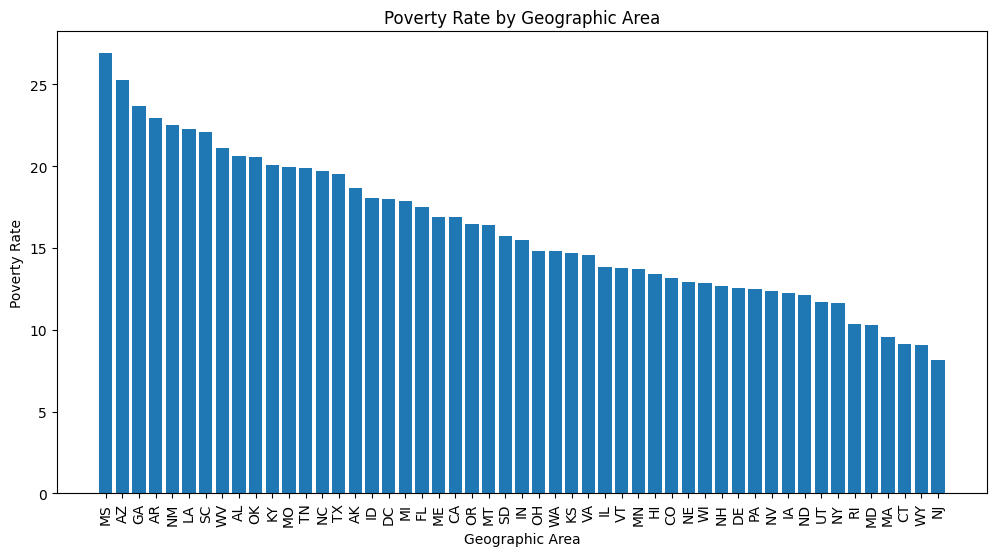

In [221]:
plt.figure(figsize=(12, 6))
plt.bar(poverty_by_states.index, poverty_by_states['poverty_rate'])
plt.xlabel('Geographic Area')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate by Geographic Area')
plt.xticks(rotation=90)
plt.show()

In [222]:
idmax = poverty_by_states['poverty_rate'].idxmax()
idmin = poverty_by_states['poverty_rate'].idxmin()

print("Geographic area with the highest poverty rate:")
print(poverty_by_states.loc[idmax])

print("\nGeographic area with the lowest poverty rate:")
print(poverty_by_states.loc[idmin])

Geographic area with the highest poverty rate:
poverty_rate   26.88
Name: MS, dtype: float64

Geographic area with the lowest poverty rate:
poverty_rate   8.16
Name: NJ, dtype: float64


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [223]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype('float')

In [224]:
graduation_by_states = df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs':pd.Series.mean})
graduation_by_states.sort_values('percent_completed_hs', ascending=False, inplace=True)
graduation_by_states.head()

,percent_completed_hs
Geographic Area,
MA,92.03
HI,91.67
CT,91.59
ME,91.43
NH,90.71


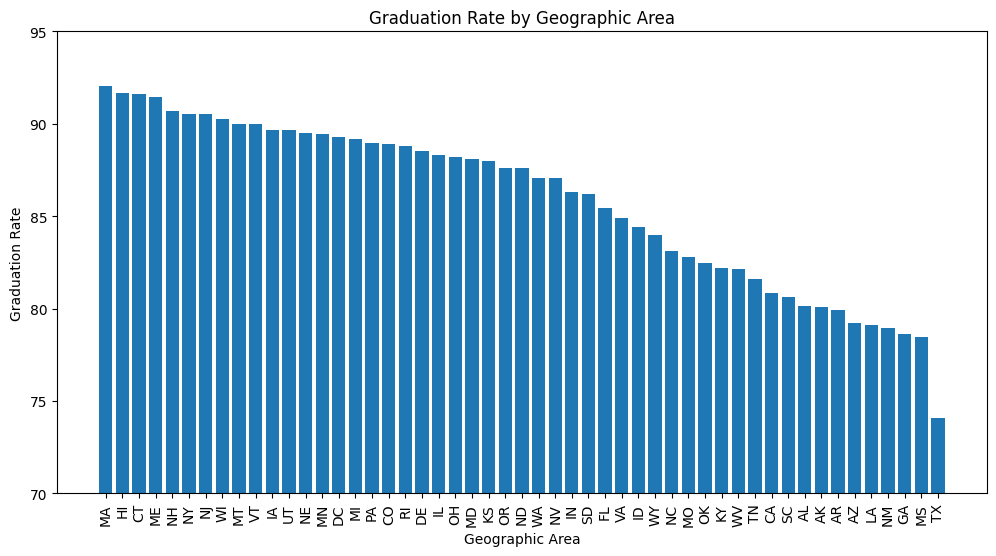

In [225]:
plt.figure(figsize=(12, 6))
plt.bar(graduation_by_states.index, graduation_by_states['percent_completed_hs'])
plt.xlabel('Geographic Area')
plt.ylabel('Graduation Rate')
plt.ylim((70, 95))
plt.title('Graduation Rate by Geographic Area')
plt.xticks(rotation=90)
plt.show()

In [226]:
idmax = graduation_by_states['percent_completed_hs'].idxmax()

print("Geographic area with the highest graduation rate:")
print(graduation_by_states.loc[idmax])

Geographic area with the highest graduation rate:
percent_completed_hs   92.03
Name: MA, dtype: float64


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [227]:
print(poverty_by_states.columns)
print(graduation_by_states.columns)

Index(['poverty_rate'], dtype='object')
Index(['percent_completed_hs'], dtype='object')


In [228]:
poverty_graduation = pd.merge(poverty_by_states, graduation_by_states, on=['Geographic Area'], how='inner')

In [229]:
poverty_graduation.head()

,poverty_rate,percent_completed_hs
Geographic Area,,
MS,26.88,78.47
AZ,25.27,79.22
GA,23.66,78.63
AR,22.96,79.95
NM,22.51,78.97


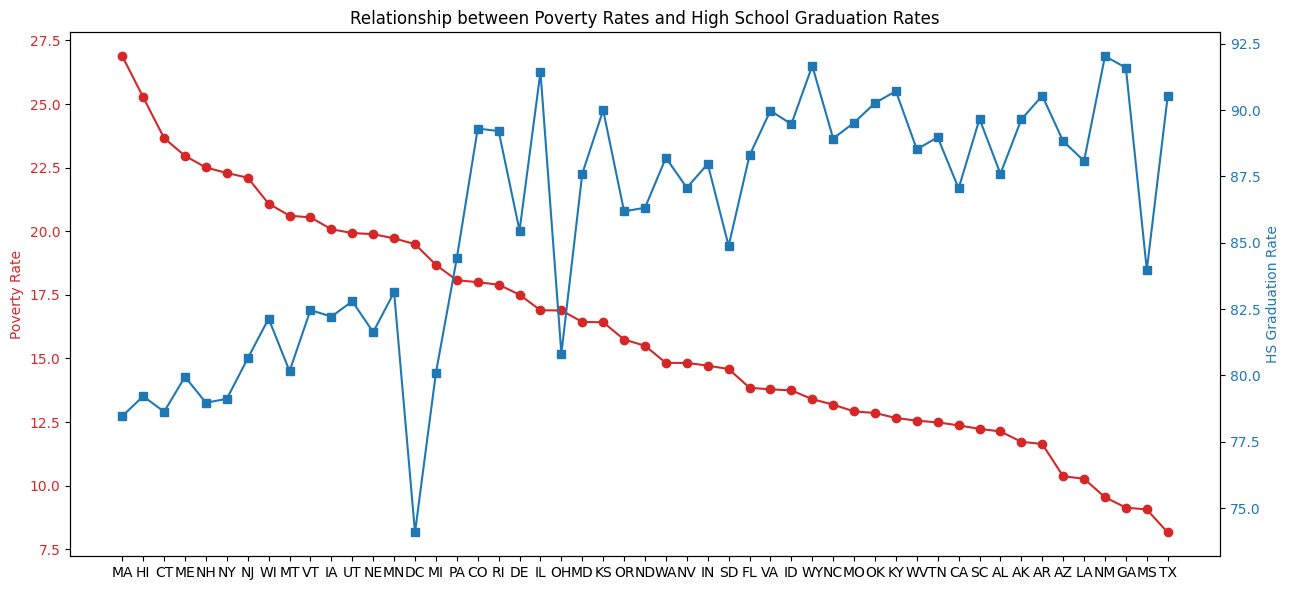

In [230]:
x = graduation_by_states.index

fig, ax1 = plt.subplots(figsize=(13, 6))

ax1.set_ylabel('Poverty Rate', color='tab:red')
ax1.plot(x, poverty_graduation['poverty_rate'], color='tab:red', label='Poverty Rate', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_xlabel('Geographic Area')
ax2.set_ylabel('HS Graduation Rate', color='tab:blue')
ax2.plot(x, poverty_graduation['percent_completed_hs'], color='tab:blue', label='HS Graduation Rate', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.xticks(rotation=90)

plt.title('Relationship between Poverty Rates and High School Graduation Rates')

plt.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

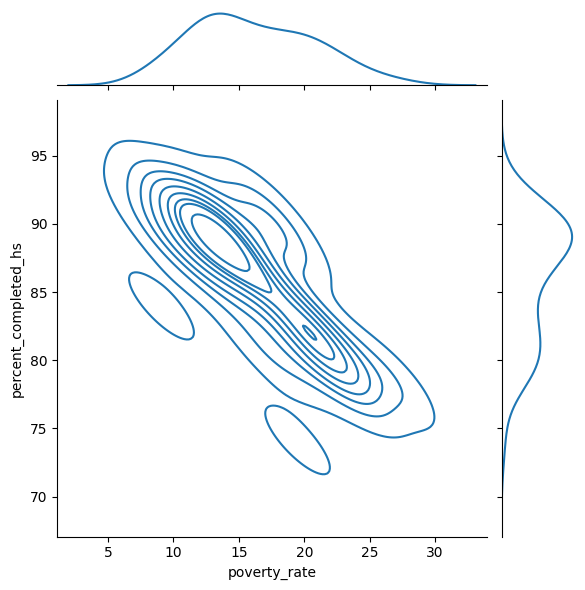

In [231]:
# Usar Seaborn jointplot con KDE y scatter plot
sns.jointplot(data=poverty_graduation, x='poverty_rate', y='percent_completed_hs', kind='kde')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

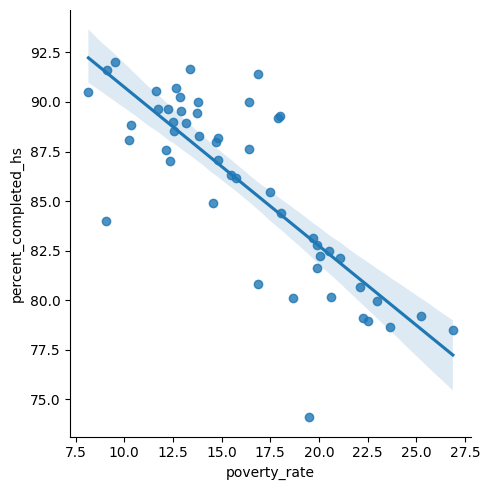

In [232]:
sns.lmplot(poverty_graduation, x='poverty_rate', y='percent_completed_hs')
plt.show()

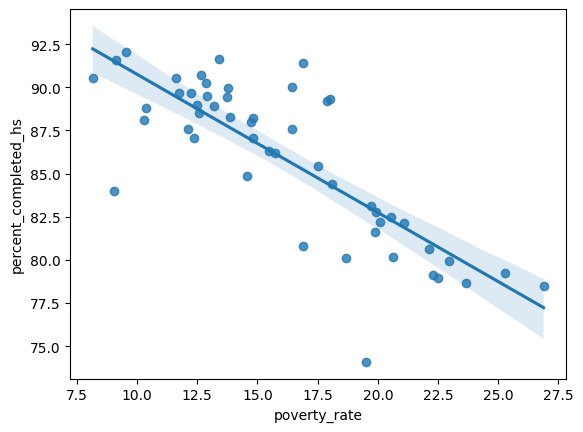

In [233]:
sns.regplot(poverty_graduation, x='poverty_rate', y='percent_completed_hs')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [234]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')

racial = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'})
racial.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


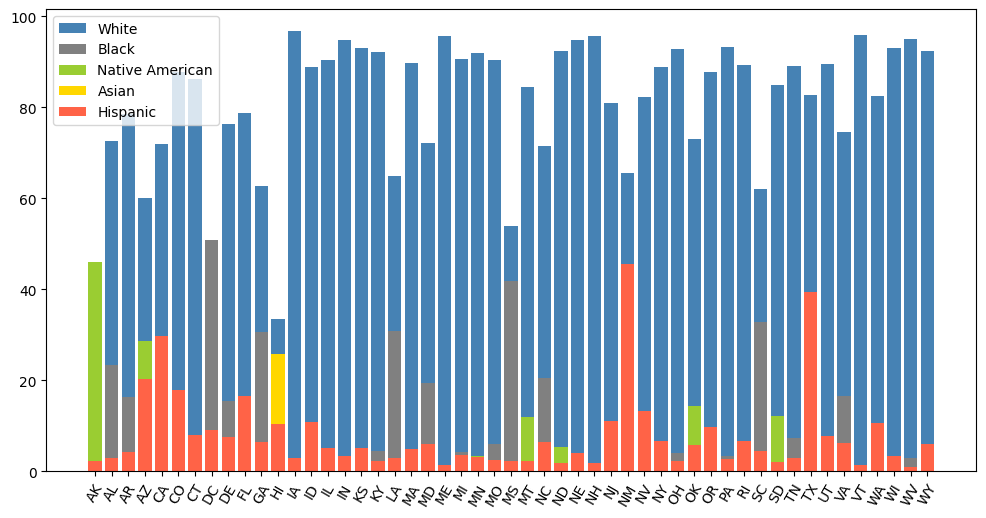

In [235]:
plt.figure(figsize=(12, 6))
labels = []
for n in range(len(racial)):
    plt.bar(racial.index[n], racial.iloc[n]['share_white'], color='steelblue', label='White' if n == 0 else "")
    plt.bar(racial.index[n], racial.iloc[n]['share_black'], color='gray', label='Black' if n == 0 else "")
    plt.bar(racial.index[n], racial.iloc[n]['share_native_american'], color='yellowgreen', label='Native American' if n == 0 else "")
    plt.bar(racial.index[n], racial.iloc[n]['share_asian'], color='gold', label='Asian' if n == 0 else "")
    plt.bar(racial.index[n], racial.iloc[n]['share_hispanic'], color='tomato', label='Hispanic' if n == 0 else "")
    labels.append(racial.index[n])

x_indexes = np.arange(len(racial))
plt.xticks(ticks=x_indexes, labels=labels, fontsize=10, rotation=60)
plt.legend()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [236]:
killed = df_fatalities[df_fatalities['race'] != 0]['race'].value_counts()

In [237]:
race_names = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Others'
}
full_labels = [race_names[label] for label in killed.index]
colors = ['steelblue', 'gray', 'tomato', 'gold', 'yellowgreen', 'silver']

<ipython-input-238-2bb11d017720>:10: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



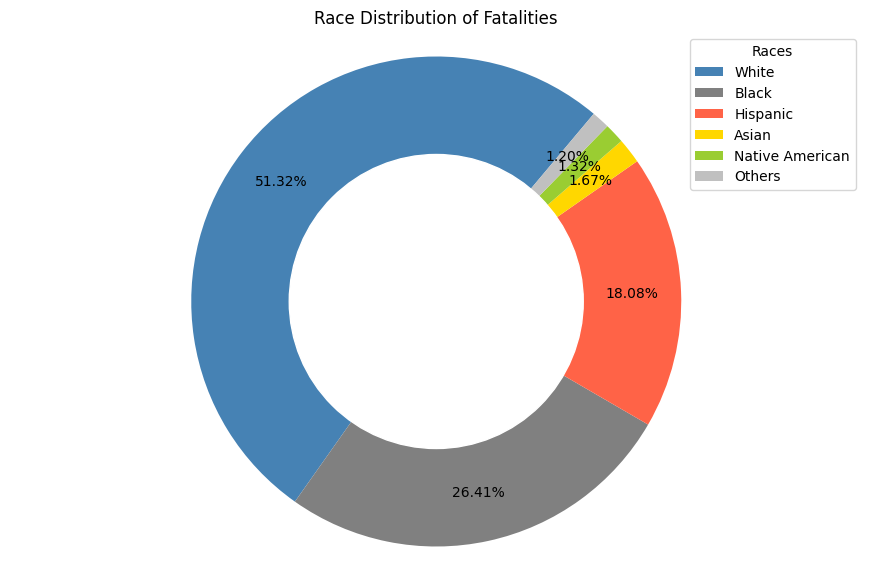

In [238]:
plt.figure(figsize=(11, 7))
plt.pie(killed, colors=colors, shadow=False, startangle=50, radius=2, pctdistance=0.8, autopct='%1.2f%%')
centre_circle = plt.Circle((0, 0), 1.2, color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Race Distribution of Fatalities')
plt.axis('equal')

plt.legend(killed.index,loc="best", title="Races", labels=full_labels)
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [239]:
killed_gender = df_fatalities.gender.value_counts()

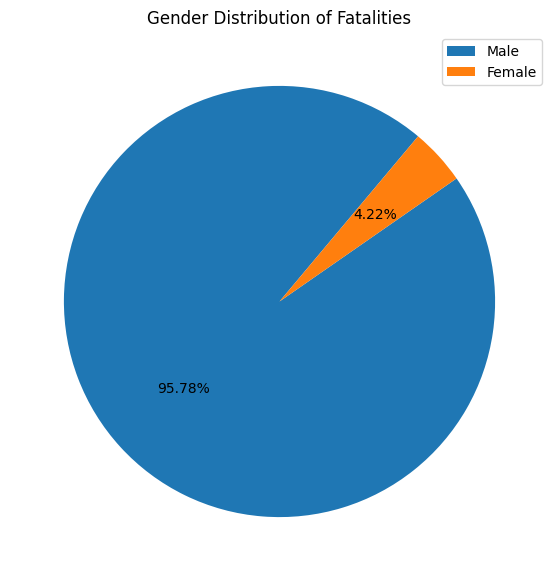

In [240]:
plt.figure(figsize=(9, 7))
plt.pie(killed_gender, startangle=50, autopct='%1.2f%%')
plt.title('Gender Distribution of Fatalities')
plt.legend(labels=('Male', 'Female'))
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [241]:
df_fatalities.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [242]:
death_age = df_fatalities[['age', 'manner_of_death', 'gender']]; death_age

,age,manner_of_death,gender
0,53.00,shot,M
1,47.00,shot,M
2,23.00,shot and Tasered,M
3,32.00,shot,M
4,39.00,shot,M
...,...,...,...
2530,31.00,shot,M
2531,0.00,shot,M
2532,48.00,shot,M
2533,28.00,shot,M


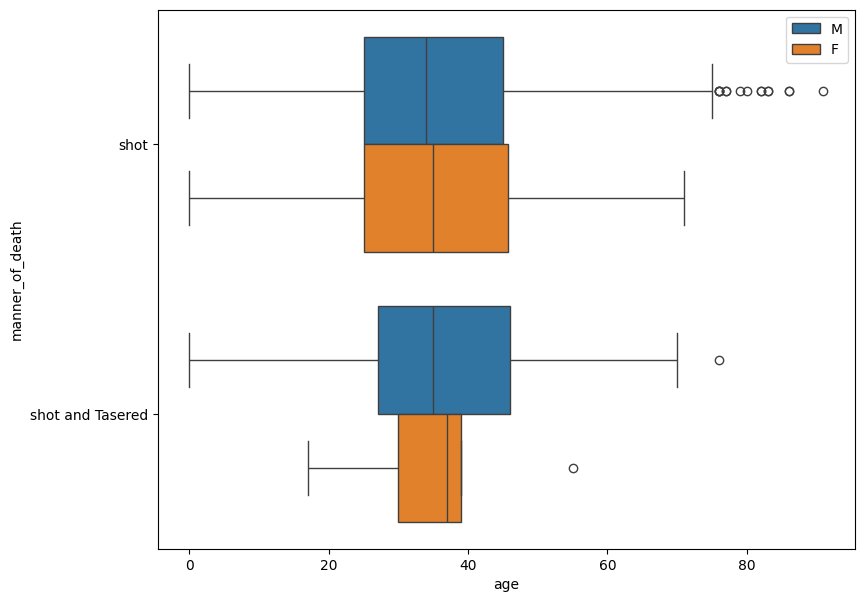

In [243]:
plt.figure(figsize=(9, 7))
sns.boxplot(death_age, x='age', y='manner_of_death', hue='gender')
plt.legend(loc='best')
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [244]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [245]:
n_unarmed = len(df_fatalities[df_fatalities.armed == 'unarmed'])
percentage_unarmed = round((n_unarmed / len(df_fatalities)) * 100,2)
print(f'{100-percentage_unarmed}% of the deceased were armed.')

93.25% of the deceased were armed.


In [246]:
arm = df_fatalities[(df_fatalities['armed'] != 'unarmed') &
 (df_fatalities['armed'] != 0)].armed.value_counts().sort_values(ascending=True)
arm.index = arm.index.astype(str)

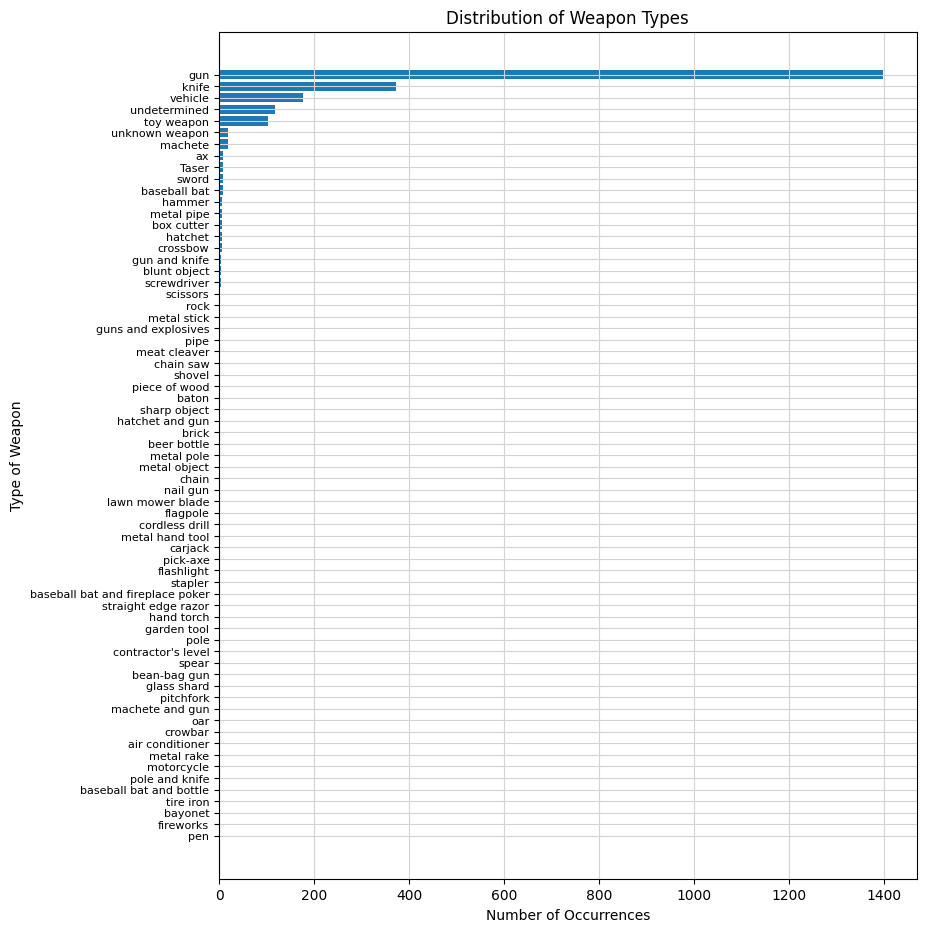

In [247]:
plt.figure(figsize=(9, 11))

plt.barh(arm.index, arm.values)

plt.yticks(fontsize=8)
plt.xlabel("Number of Occurrences")
plt.ylabel("Type of Weapon")
plt.title("Distribution of Weapon Types")
plt.grid(c='lightgray')
plt.show()

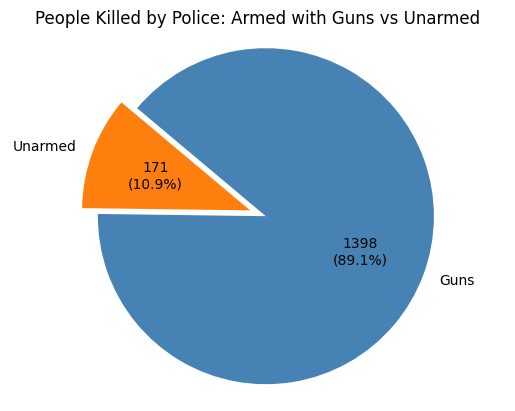

In [248]:
n_unarmed = len(df_fatalities[df_fatalities.armed == 'unarmed'])
n_guns = len(df_fatalities[df_fatalities.armed == 'gun'])
sizes = [n_unarmed, n_guns]
labels = ['Unarmed', 'Guns']

def custom_autopct(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f'{absolute}\n({pct:.1f}%)'

plt.pie(sizes, explode=(0.1, 0), labels=labels, colors=['tab:orange', 'steelblue'],
    autopct=lambda pct: custom_autopct(pct, sizes),startangle=140)

plt.title('People Killed by Police: Armed with Guns vs Unarmed')
plt.axis('equal')

plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [249]:
junior = df_fatalities.loc[df_fatalities['age'] < 25]
under = junior.id.count()

senior = df_fatalities.loc[df_fatalities['age'] > 25]
over = senior.id.count()

print(f"{round((under / over) * 100)}% of people killed were under 25 years old.")

28% of people killed were under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

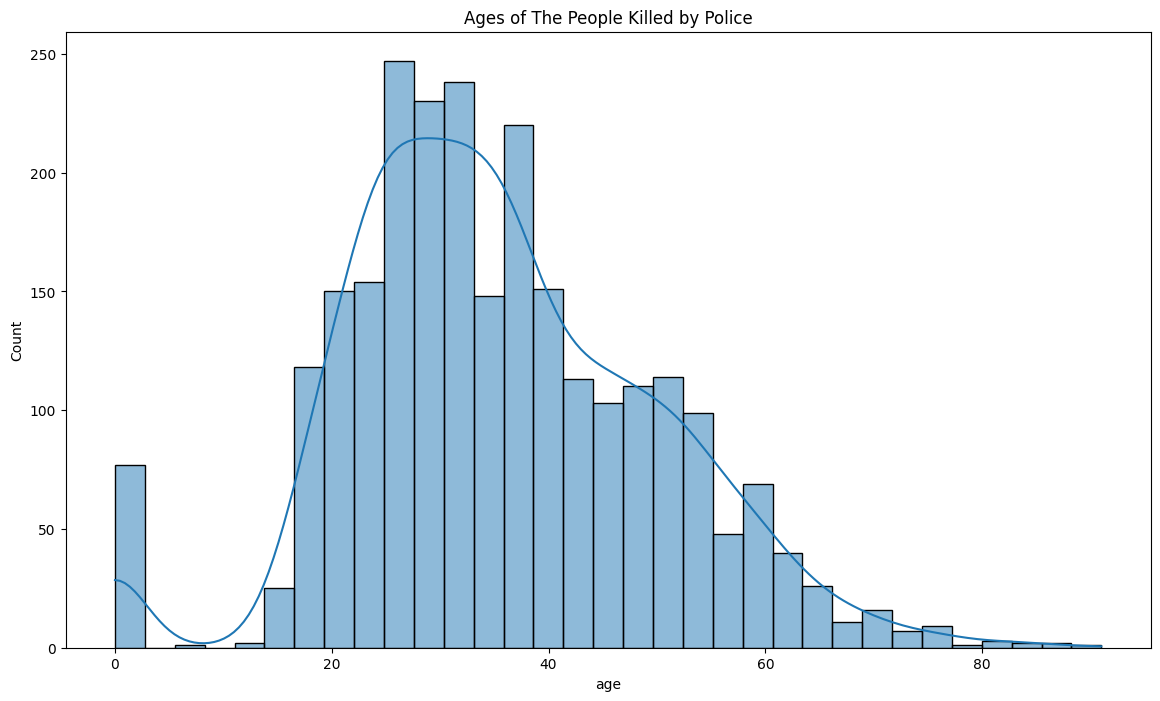

In [250]:
plt.figure(figsize=(14,8))
plt.title('Ages of The People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

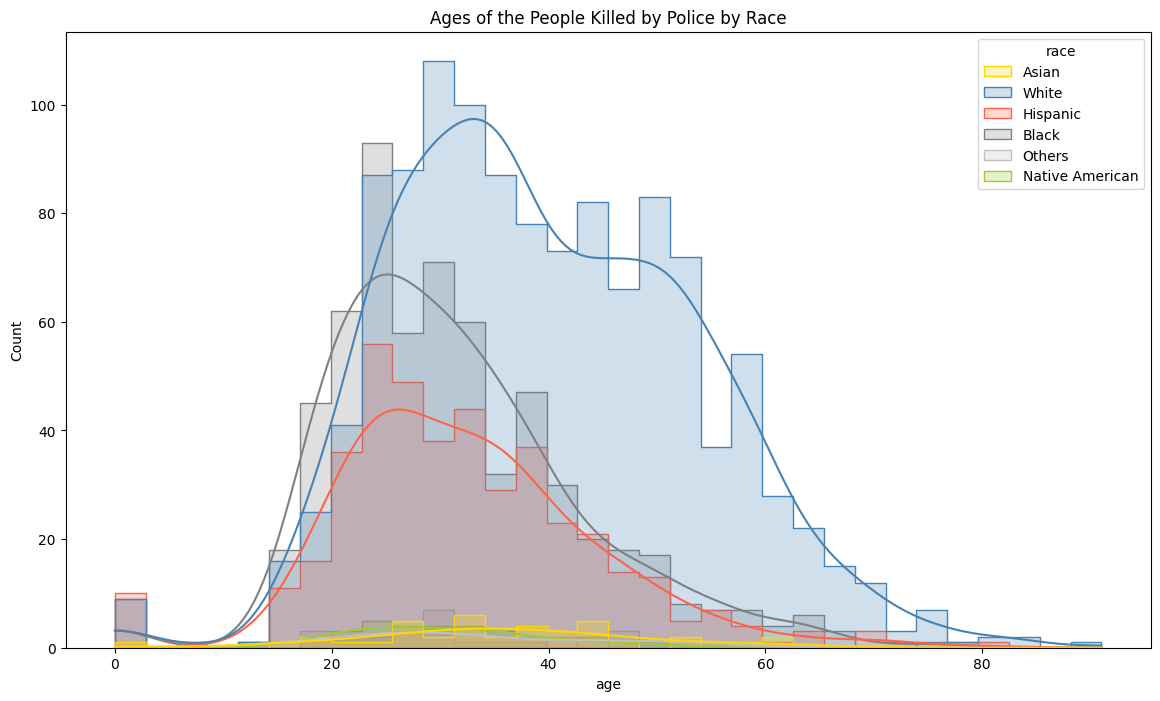

In [251]:
filtered_data = df_fatalities[df_fatalities['race'] != '0']
filtered_data['race'] = filtered_data['race'].map(race_names)

colors = ['steelblue', 'gray', 'tomato', 'gold', 'yellowgreen', 'silver']
race_palette = {name: color for name, color in zip(race_names.values(), colors)}

plt.figure(figsize=(14, 8))
plt.title('Ages of the People Killed by Police by Race')

sns.histplot(data=filtered_data, x="age", kde=True, hue="race", element="step", palette=race_palette)
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [252]:
race_killed = filtered_data.race.value_counts()

<ipython-input-253-41e3f945062e>:6: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



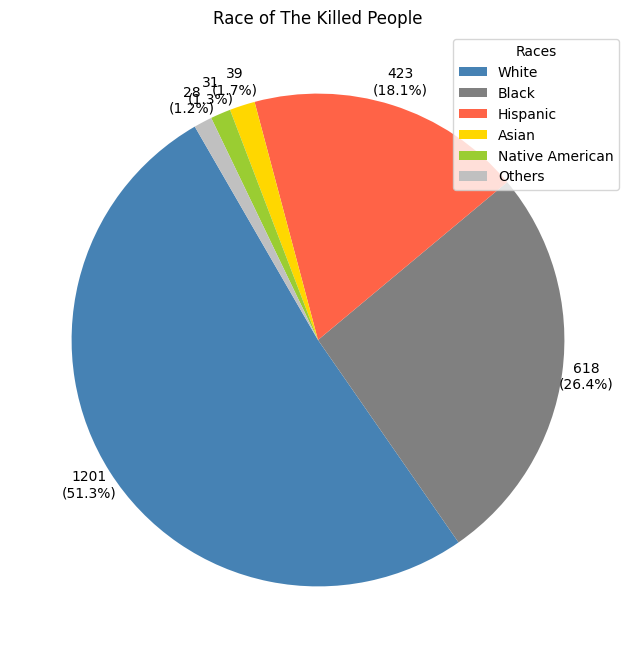

In [253]:
plt.figure(figsize=(12, 8))
plt.title('Race of The Killed People')

plt.pie(race_killed, autopct=lambda pct: custom_autopct(pct, race_killed), startangle=120,
        pctdistance=1.1, colors=colors)
plt.legend(killed.index, loc="upper right", title="Races", labels=full_labels, fontsize=10)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [254]:
mental = df_fatalities.signs_of_mental_illness.value_counts()
mental

,count
signs_of_mental_illness,
False,1902
True,633


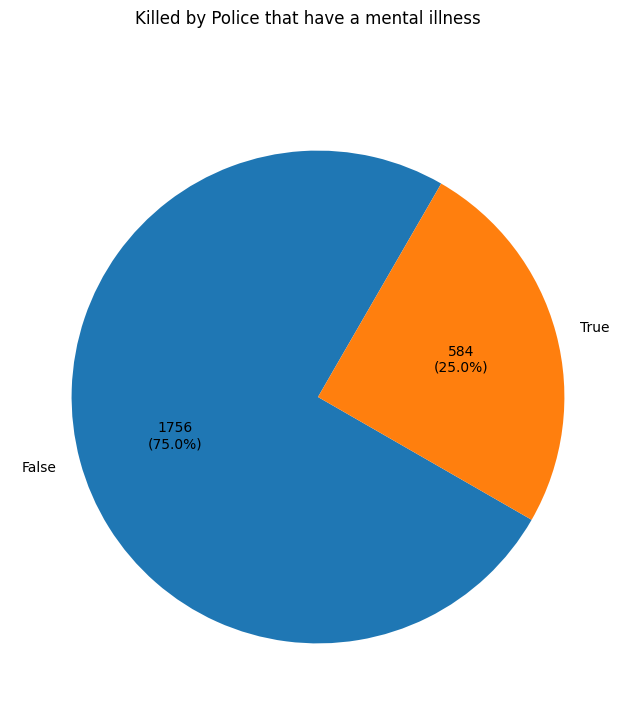

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Killed by Police that have a mental illness')
plt.pie(mental, labels=mental.index, autopct=lambda pct: custom_autopct(pct, race_killed), startangle=60, labeldistance=1.1)
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [256]:
df_fatalities['city_state'] = df_fatalities['city'] + ", " + df_fatalities['state']
top_10_cities_killings = df_fatalities['city_state'].value_counts().head(10)
top_10_cities_killings

,count
city_state,
"Los Angeles, CA",39
"Phoenix, AZ",31
"Houston, TX",26
"Chicago, IL",25
"Las Vegas, NV",21
"San Antonio, TX",20
"Columbus, OH",17
"Miami, FL",17
"Austin, TX",16


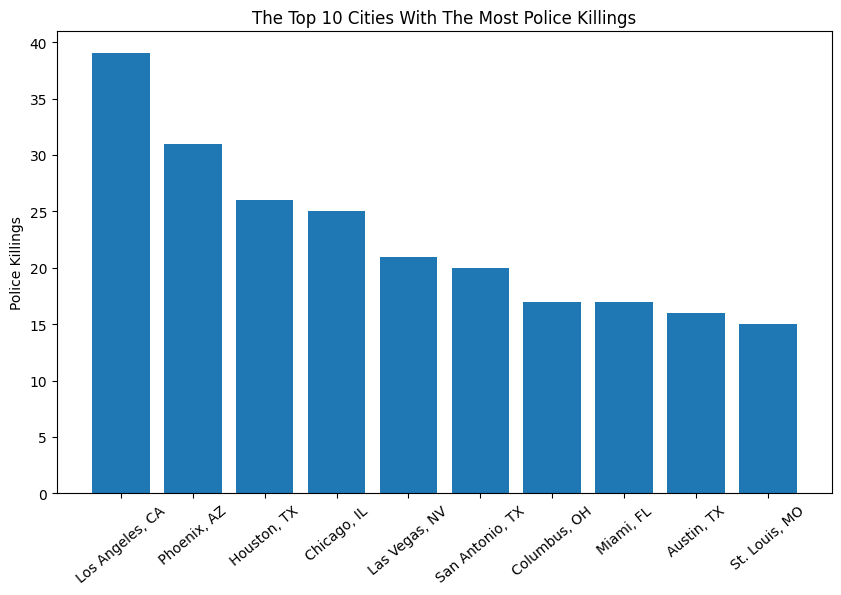

In [257]:
plt.figure(figsize=(10,6))
plt.title('The Top 10 Cities With The Most Police Killings')
plt.ylabel('Police Killings')
plt.xticks(rotation=40)
plt.bar(top_10_cities_killings.index, top_10_cities_killings, label=top_10_cities_killings.index, linewidth=3)
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

<ipython-input-258-6839f73b42be>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



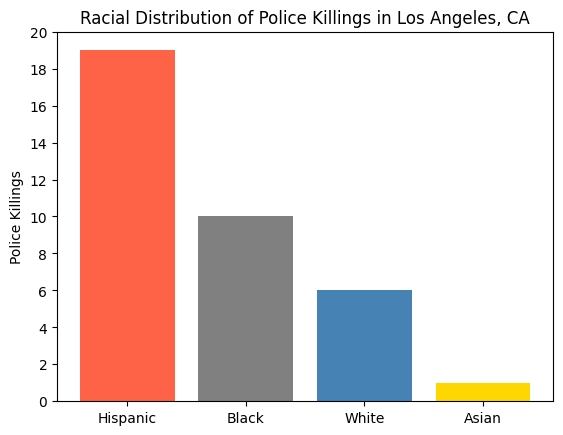

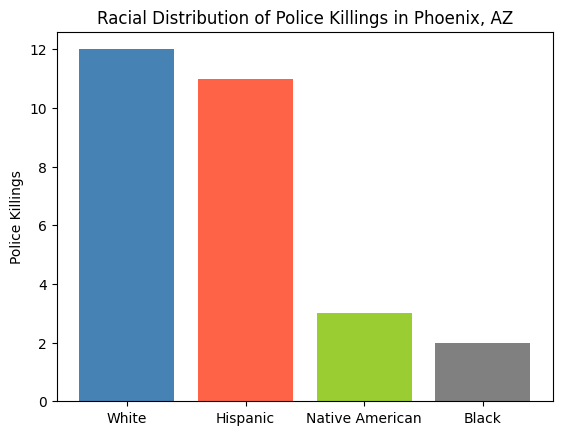

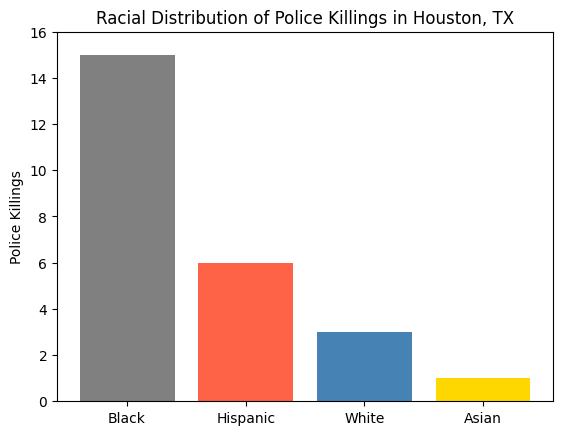

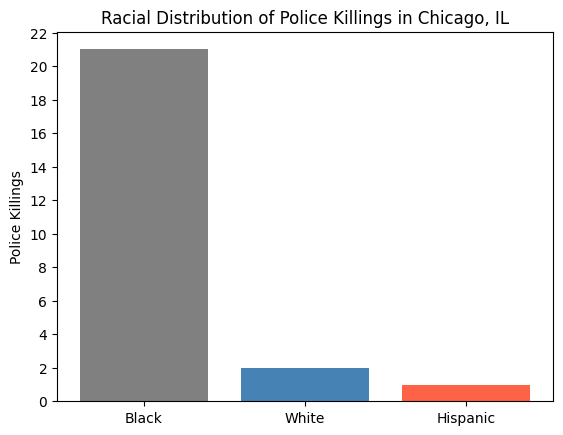

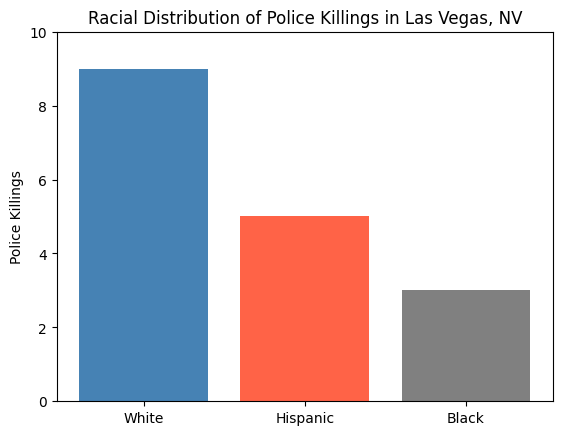

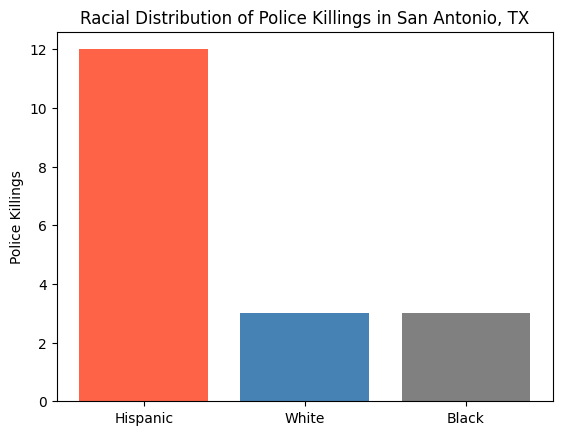

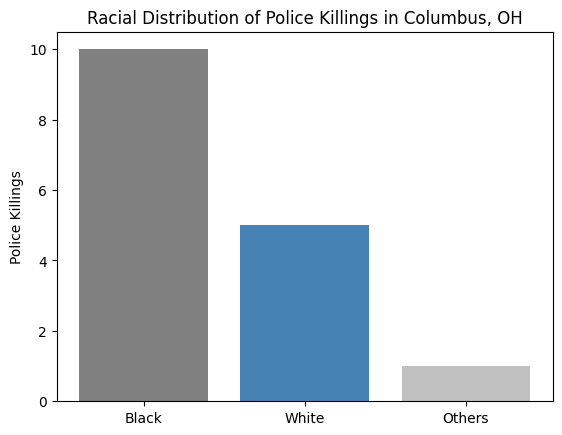

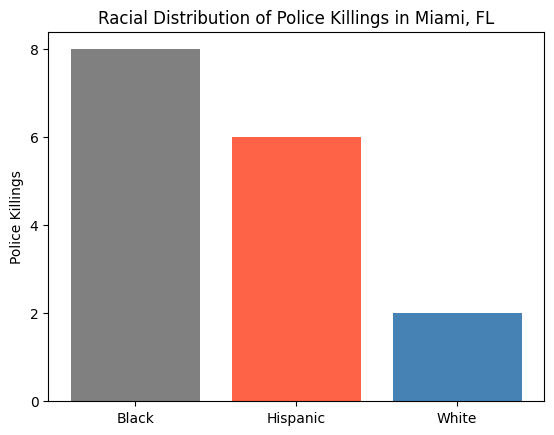

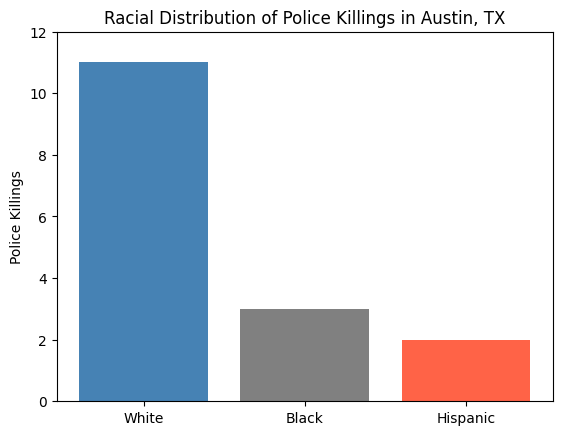

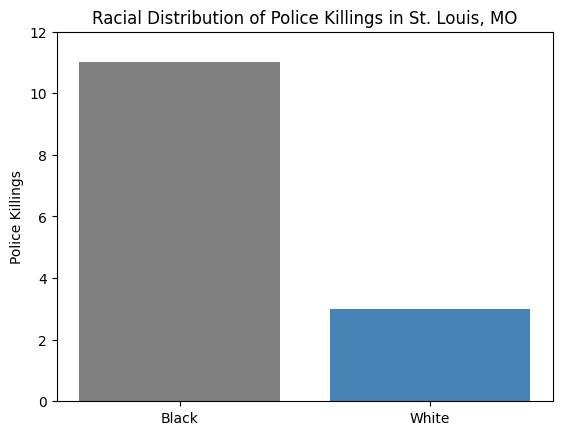

In [258]:
city_race = filtered_data[['city', 'race', 'state']]
city_race.loc[:, 'city_state'] = city_race['city'] + ", " + city_race['state']

color_map = {
    'White': 'steelblue',
    'Black': 'gray',
    'Hispanic': 'tomato',
    'Asian': 'gold',
    'Native American': 'yellowgreen',
    'Others': 'silver'
}

top_10_cities_with_state = city_race['city_state'].value_counts().head(10)

for c in top_10_cities_with_state.index:
    top_cities = city_race.loc[city_race['city_state'] == c]
    city_race_counts = top_cities['race'].value_counts()
    city_race_counts.index = city_race_counts.index.astype(str)
    colors_for_city = [color_map.get(race, 'gray') for race in city_race_counts.index]

    plt.bar(city_race_counts.index, city_race_counts, color=colors_for_city, label=c)
    plt.title(f'Racial Distribution of Police Killings in {c}')
    plt.ylabel('Police Killings')

    max_y = city_race_counts.max()
    plt.yticks(np.arange(0, max_y + 2, 2))

    plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [259]:
states_dangerous = df_fatalities.groupby('state').size().sort_values(ascending=False)
states_dangerous.head(10)

,0
state,
CA,424
TX,225
FL,154
AZ,118
OH,79
OK,78
CO,74
GA,70
NC,69


In [260]:
print(states_dangerous.head(10))
print(25*'-')
print(top_10_cities_with_state)

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
dtype: int64
-------------------------
city_state
Los Angeles, CA    39
Phoenix, AZ        31
Houston, TX        26
Chicago, IL        25
Las Vegas, NV      21
San Antonio, TX    20
Columbus, OH       17
Miami, FL          17
Austin, TX         16
St. Louis, MO      15
Name: count, dtype: int64


In [261]:
states_dangerous_df = states_dangerous.reset_index()
states_dangerous_df.columns = ['state', 'counts']

states_killing_map = px.choropleth(states_dangerous_df, locations='state', locationmode='USA-states', color='counts', scope='usa')
states_killing_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [262]:
monthly_killings = df_fatalities.copy()
monthly_killings['date'] = pd.to_datetime(monthly_killings['date'], format='%d/%m/%y', dayfirst=True).dt.to_period('M')
monthly_killings['date'] = monthly_killings['date'].astype(str)
monthly_killings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,city_state
0,3,Tim Elliot,2015-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,"Shelton, WA"
1,4,Lewis Lee Lembke,2015-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,"Aloha, OR"
2,5,John Paul Quintero,2015-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,"Wichita, KS"
3,8,Matthew Hoffman,2015-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,"San Francisco, CA"
4,9,Michael Rodriguez,2015-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,"Evans, CO"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False,"Kansas City, MO"
2531,2813,TK TK,2017-07,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False,"Albuquerque, NM"
2532,2818,Dennis W. Robinson,2017-07,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False,"Melba, ID"
2533,2817,Isaiah Tucker,2017-07,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,"Oshkosh, WI"


In [263]:
monthly_killings_history = monthly_killings.groupby('date').size()

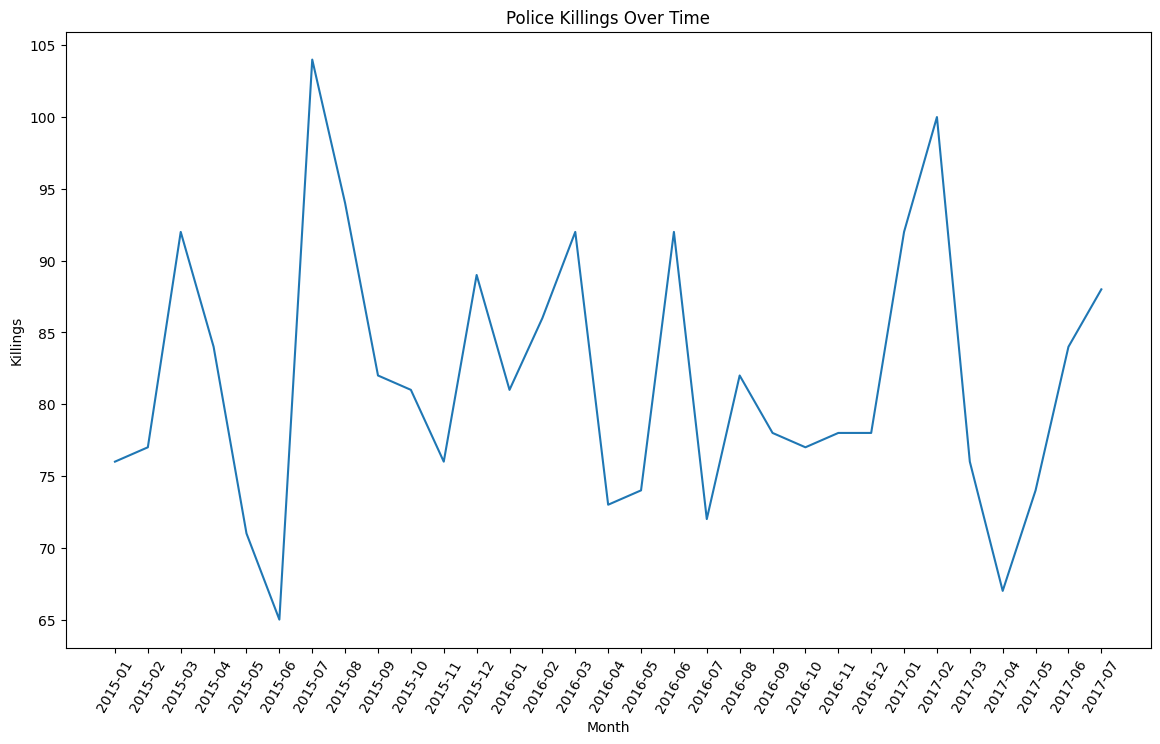

In [264]:
plt.figure(figsize=(14,8))
plt.plot(monthly_killings_history.index, monthly_killings_history)
plt.xticks(ticks=monthly_killings_history.index, rotation=60)
plt.title('Police Killings Over Time')
plt.xlabel('Month')
plt.ylabel('Killings')
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).